In [2]:
%matplotlib inline 

import sys
sys.path.append('../')
sys.path.append('../../stackedgp_src')
import numpy as np
from __future__ import division
from mpl_toolkits.mplot3d import axes3d
import GPy, sys, matplotlib
import matplotlib.pyplot as plt
from stackedGPNetwork import StackedGPNetwork
from toyUtil import ToyUtil
from sklearn.preprocessing import StandardScaler
FONT_SIZE = 15
matplotlib.rc('axes', linewidth=1.2)
matplotlib.rc('font', weight='semibold',size=FONT_SIZE)
matplotlib.rc('lines', linewidth=2)

In [3]:
def normalize(inputdata):
        scaler = StandardScaler()
        norminput = scaler.fit_transform(inputdata)
        return norminput,scaler
    
def generateX(nsamples, start=-6, end=6):
    x = np.random.uniform(start,end,(nsamples,1))
    return x

def getT(x, xid):
    if xid == 1:
        return np.sin(x)
    else:
        return np.sin(x)

def getA(t1, t2):
    return t1*t2

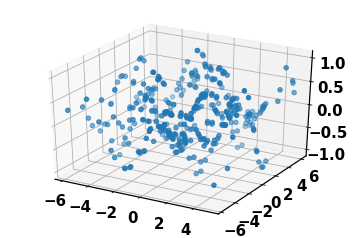

In [4]:
#generate X,T,A for training
ntraining = 20
x1_train = generateX(ntraining)
x2_train = generateX(ntraining)

ntraining = len(x1_train)
t1_train = getT(x1_train, 1).reshape(-1,1)
t2_train = getT(x2_train, 2).reshape(-1,1)

# X, Y, Z = axes3d.get_test_data(0.05)
t1_r_train = np.repeat(t1_train, ntraining, axis=1)
t2_r_train = np.repeat(t2_train, ntraining, axis=1).T

x1_r_train = np.repeat(x1_train, ntraining, axis=1)
x2_r_train = np.repeat(x2_train, ntraining, axis=1).T

a_train = getA(t1_r_train, t2_r_train)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x[:,0:1],x[:,1:2], a_train)
ax.scatter(x1_r_train,x2_r_train, a_train)
plt.show()

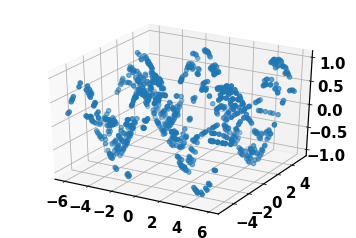

In [5]:
#generate X,T,A for training
ntesting = 30
x1_test = generateX(ntesting)
x2_test = generateX(ntesting)

ntesting = len(x1_test)

t1_test = getT(x1_test, 1).reshape(-1,1)
t2_test = getT(x2_test, 2).reshape(-1,1)

t1_r_test = np.repeat(t1_test, ntesting, axis=1)
t2_r_test = np.repeat(t2_test, ntesting, axis=1).T

x1_r_test = np.repeat(x1_test, ntesting, axis=1)
x2_r_test = np.repeat(x2_test, ntesting, axis=1).T

a_test = getA(t1_r_test, t2_r_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1_r_test,x2_r_test, a_test)
plt.show()

In [6]:
# v = a_train.shape
a_train_norm,a_train_sc = normalize(a_train.reshape(-1,1))

x1_train_norm,x1_train_sc = normalize(x1_train)
x2_train_norm,x2_train_sc = normalize(x2_train)
t1_train_norm,t1_train_sc = normalize(t1_train)
t2_train_norm,t2_train_sc = normalize(t2_train)

t1_r_train_norm = np.repeat(t1_train_norm, ntraining, axis=1)
t2_r_train_norm = np.repeat(t2_train_norm, ntraining, axis=1).T
layer2GPinput = np.hstack((t1_r_train_norm.reshape(-1,1),t2_r_train_norm.reshape(-1,1)))

stackedNetwork = StackedGPNetwork(2)
stackedNetwork.createNewNode(1,layer2GPinput,a_train_norm.reshape(-1,1), normalize=False, useGPU=False)
stackedNetwork.createNewNode(0,x1_train_norm,t1_train_norm, normalize=False, useGPU=False)
stackedNetwork.createNewNode(0,x2_train_norm,t2_train_norm, normalize=False, useGPU=False)

In [7]:
stackedNetwork.optimize(numoptimizationtrails=5)

Optimization restart 1/5, f = -74.0808279956
Optimization restart 2/5, f = -74.0808241968
Optimization restart 3/5, f = -74.0808281735
Optimization restart 4/5, f = -74.0808284399
Optimization restart 5/5, f = -74.0808288411
Optimization restart 1/5, f = -65.7314941263
Optimization restart 2/5, f = -65.7314925419
Optimization restart 3/5, f = -65.7314937507
Optimization restart 4/5, f = -65.7314933744
Optimization restart 5/5, f = -65.7314942202


 /usr/local/lib/python2.7/site-packages/GPy/kern/src/stationary.py:167: RuntimeWarning:overflow encountered in divide
 /usr/local/lib/python2.7/site-packages/GPy/kern/src/rbf.py:43: RuntimeWarning:overflow encountered in square
 /usr/local/lib/python2.7/site-packages/GPy/kern/src/rbf.py:46: RuntimeWarning:invalid value encountered in multiply


Optimization restart 1/5, f = -3181.78092309
Optimization restart 2/5, f = -3185.99208949
Optimization restart 3/5, f = -3182.06737158
Optimization restart 4/5, f = -3182.5220839
Optimization restart 5/5, f = -3182.37682707


 /usr/local/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


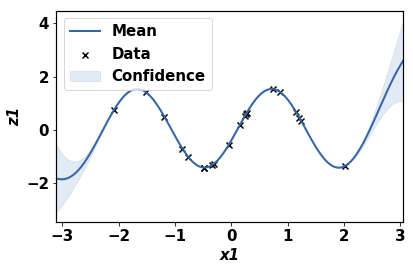

In [8]:
ax = stackedNetwork.getNode(0,0).plot()
ax.set_xlabel('x1',fontweight='bold',fontstyle='italic')
ax.set_ylabel('z1',fontweight='bold',fontstyle='italic')
plt.savefig('../img/exm1x1z1.png', bbox_inches='tight', pad_inches=0.2, rasterized=True,dpi=300)

 /usr/local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning:Function std_ is deprecated; Attribute ``std_`` will be removed in 0.19. Use ``scale_`` instead


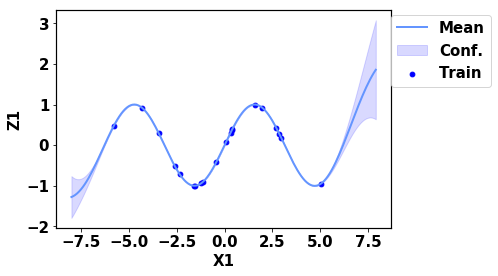

In [9]:
x_rang_test = np.arange(-8,8,0.1).reshape(-1,1)
x1_test_norm =x1_train_sc.transform(x_rang_test)

g1_mean_test, g1_var_test = stackedNetwork.getNode(0,0).predict(x1_test_norm)

anlyt_mean_test2 = t1_train_sc.inverse_transform(g1_mean_test.reshape(-1,1)).reshape(-1,1)

std2 = t1_train_sc.std_[0]*np.sqrt(g1_var_test).ravel()
var_test2 = std2**2

sort_indexs = np.argsort(x_rang_test.reshape(-1))
std = np.sqrt(var_test2[sort_indexs]).ravel()
xx = x_rang_test[sort_indexs].ravel()
pred_sort_mean = anlyt_mean_test2[sort_indexs].ravel()

ymax = 2*std+pred_sort_mean.ravel()
ymin = -2*std+pred_sort_mean.ravel()
plt.plot(xx, pred_sort_mean, c='#6495FF',label='Mean')
plt.fill_between(xx, ymax, ymin, alpha=0.15,color='b',edgecolor='k', linewidth=1,label="Conf.")
plt.xlabel('X1',fontsize=FONT_SIZE, fontweight='bold')
plt.ylabel("Z1",fontsize=FONT_SIZE, fontweight='bold')
plt.scatter(x1_train, t1_train, c='b', s=90, marker='.', label='Train')


plt.legend(bbox_to_anchor=(1.0, 0.98), loc=2, borderaxespad=0.,fontsize=FONT_SIZE)
plt.savefig("../img/gp1_mean_x_y.png",bbox_inches='tight', 
               transparent=True,
               pad_inches=0.05)

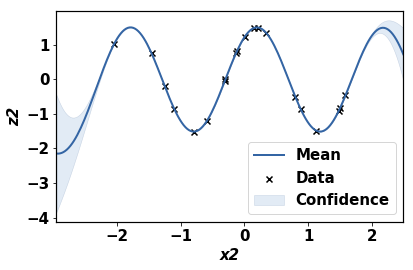

In [10]:
ax = stackedNetwork.getNode(0,1).plot()
ax.set_xlabel('x2',fontweight='bold',fontstyle='italic')
ax.set_ylabel('z2',fontweight='bold',fontstyle='italic')
plt.savefig('../img/exm1x2z2.png', bbox_inches='tight', pad_inches=0.2, rasterized=True,dpi=300)

 /usr/local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning:Function std_ is deprecated; Attribute ``std_`` will be removed in 0.19. Use ``scale_`` instead


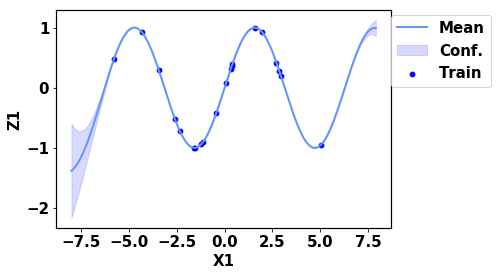

In [11]:

x_rang_test = np.arange(-8,8,0.1).reshape(-1,1)
x1_test_norm =x2_train_sc.transform(x_rang_test)

g1_mean_test, g1_var_test = stackedNetwork.getNode(0,1).predict(x1_test_norm)

anlyt_mean_test2 = t2_train_sc.inverse_transform(g1_mean_test.reshape(-1,1)).reshape(-1,1)

std2 = t2_train_sc.std_[0]*np.sqrt(g1_var_test).ravel()
var_test2 = std2**2

sort_indexs = np.argsort(x_rang_test.reshape(-1))
std = np.sqrt(var_test2[sort_indexs]).ravel()
xx = x_rang_test[sort_indexs].ravel()
pred_sort_mean = anlyt_mean_test2[sort_indexs].ravel()

ymax = 2*std+pred_sort_mean.ravel()
ymin = -2*std+pred_sort_mean.ravel()
plt.plot(xx, pred_sort_mean, c='#6495FF',label='Mean')
plt.fill_between(xx, ymax, ymin, alpha=0.15,color='b',edgecolor='k', linewidth=1,label="Conf.")
plt.xlabel('X1',fontsize=FONT_SIZE, fontweight='bold')
plt.ylabel("Z1",fontsize=FONT_SIZE, fontweight='bold')
plt.scatter(x1_train, t1_train, c='b', s=90, marker='.', label='Train')


plt.legend(bbox_to_anchor=(1.0, 0.98), loc=2, borderaxespad=0.,fontsize=FONT_SIZE)
plt.savefig("../img/gp1_mean_x_y.png",bbox_inches='tight', 
               transparent=True,
               pad_inches=0.05)

 /usr/local/lib/python2.7/site-packages/GPy/likelihoods/gaussian.py:111: RuntimeWarning:invalid value encountered in sqrt


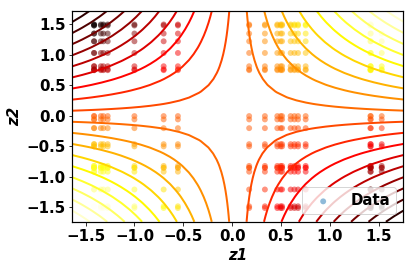

In [12]:
ax = stackedNetwork.getNode(1,0).plot()
ax.set_xlabel('z1',fontweight='bold',fontstyle='italic')
ax.set_ylabel('z2',fontweight='bold',fontstyle='italic')
plt.savefig('../img/exm1yz1z2.png', bbox_inches='tight', pad_inches=0.2, rasterized=True,dpi=300)

GP3 mean training data....


 /usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning:invalid value encountered in sqrt


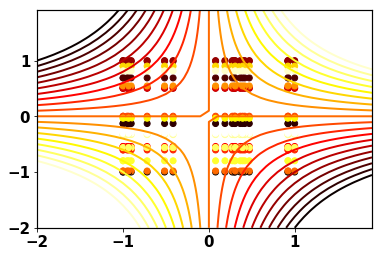

In [51]:
print 'GP3 mean training data....'

t1_rang_test = np.arange(-2,2,0.1).reshape(-1,1)
t2_rang_test = np.arange(-2,2,0.1).reshape(-1,1)

t1,t2 = np.meshgrid(t1_rang_test,t2_rang_test)

t1_test_norm =t1_train_sc.transform(t1).reshape(-1,1)
t2_test_norm =t2_train_sc.transform(t2).reshape(-1,1)

t_d = np.concatenate((t1_test_norm,t2_test_norm), axis=1)
g2_mean_test, g2_var_test = stackedNetwork.getNode(1,0).predict(t_d)
anlyt_mean_test2 = a_train_sc.inverse_transform(g2_mean_test.reshape(-1,1)).reshape(t1.shape)
std2 = a_train_sc.scale_[0]*np.sqrt(g2_var_test).ravel()
var_test2 = std2**2

plt.figure()
levels = np.arange(-2,2,0.2)
CS = plt.contour(t1, t2, anlyt_mean_test2,cmap=plt.cm.hot,levels=levels)
colors = plt.cm.hot(np.linspace(0, 1, len(a_train)))
plt.scatter(t1_r_train,t2_r_train,color=colors)
cl = plt.clabel(CS, fontsize=10,inline=False)
for label in cl:
    label.remove()
# plt.title('Simplest default with labels')

In [52]:
# def heatmap1(z,locX,locY,title_label):
#     x = locX.ravel()
#     y = locY.ravel()
# #     z = hm_Zn1.ravel()
#     plt.hexbin(x, y, C=z, gridsize=70, cmap=plt.cm.jet, bins=None)
#     plt.axis([x.min(), x.max(), y.min(), y.max()])
#     cb = plt.colorbar()
#     cb.set_label('mean value',fontsize=FONT_SIZE, fontweight='bold')
# #     plt.title(title_label)
# #     plt.scatter(x=trainX[:,0], y=trainX[:,1],marker='+' )
#     plt.savefig("_".join(title_label)+"1_no_noise.png",bbox_inches='tight', 
#                transparent=True,
#                pad_inches=0.05)

In [53]:

# x = np.linspace(-8,8, 50)
# y = np.linspace(-8,8, 50)
# locX,locY = np.meshgrid(x, y)
# xnorm = x1_train_sc.transform(locX.reshape(-1,1))
# ynorm = x2_train_sc.transform(locY.reshape(-1,1))
# testinginput = np.concatenate((xnorm, ynorm), axis=1)
# anlyt_mean_train, var = stackedNetwork.predict(testinginput, covoption=2, jitter=0)
# anlyt_mean_train = anlyt_mean_train[-1]
# var = var[-1]
# anlyt_mean_train2 = a_train_sc.inverse_transform(anlyt_mean_train.reshape(-1,1)).reshape(-1,ntraining)

# heatmap1(anlyt_mean_train2.ravel(),'Heatmap for Zn')

In [61]:
def predictStacked(x1,x2):
    print ".",#x1.shape
    x1_test_norm =x1_train_sc.transform(x1)
    x2_test_norm = x2_train_sc.transform(x2)

    x1_r_test_norm = np.repeat(x1_test_norm, x1_test_norm.shape[0], axis=1)
    x2_r_test_norm = np.repeat(x2_test_norm, x1_test_norm.shape[0], axis=1).T
#     print x1_r_test_norm.shape
    testinginput = np.concatenate((x1_r_test_norm.reshape(-1,1), x2_r_test_norm.reshape(-1,1)), axis=1)

    anlyt_mean_test, var_test = stackedNetwork.predict(testinginput)
    anlyt_mean_test = anlyt_mean_test[-1]
    var_test = var_test[-1]

    anlyt_mean_test2 = a_train_sc.inverse_transform(anlyt_mean_test.reshape(-1,1)).reshape(-1,x1_test_norm.shape[0])

#     var_test2 = a_train_sc.inverse_transform(var_test.reshape(-1,1)).reshape(-1,x1_test_norm.shape[0])
    std_test2 = np.sqrt(var_test.reshape(-1,1)).reshape(-1,x1_test_norm.shape[0])*a_train_sc.scale_

    
    return anlyt_mean_test2, std_test2



. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

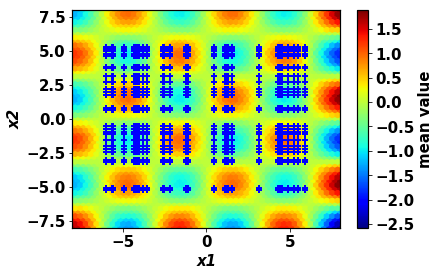

In [62]:
# def draw_surface(xst,xend,yst,yend):
def draw_surface(x,y,fx,fy,fz,fstd):
    X, Y = np.meshgrid(x, y)
    zs,zstd = predictStacked(x.reshape(-1,1), y.reshape(-1,1))
    Z2 = zs.reshape(X.shape)
    z = Z2.ravel()
    fx = fx+ list(X.T.ravel())
    fy = fy + list(Y.T.ravel())
    fz = fz+list(z)
    fstd = fstd+list(zstd.ravel())
    return fx,fy,fz,fstd
#     plt.axis([x.min(), x.max(), y.min(), y.max()])
    
fig = plt.figure()
fx = []
fy = []
fz = []
fstd = []
ax = fig.add_subplot(111)
maxlimt = 100
x = np.linspace(-8,8, maxlimt)
y = np.linspace(-8,8, maxlimt)

step = 10
for i in range(0,maxlimt,step):
    for j in range(0,maxlimt,step):
        fx,fy,fz,fstd= draw_surface(x[i:i+step],y[j:j+step],fx,fy,fz,fstd)

plt.hexbin(fx, fy, C=fz, cmap=plt.cm.jet,gridsize=50)

ax.set_xlabel('x1',fontweight='bold',fontstyle='italic')
ax.set_ylabel('x2',fontweight='bold',fontstyle='italic')
cb = plt.colorbar()
cb.set_label('mean value',fontsize=FONT_SIZE, fontweight='bold')

# ax.scatter(x1_r_train,x2_r_train, a_train, marker='.', c='b', s=50)
anlyt_mean_test2, zstd = predictStacked(x1_test,x2_test)

pplus = np.abs(a_test -anlyt_mean_test2) > 2*zstd
ax.scatter(x1_r_test[pplus],x2_r_test[pplus], a_test[pplus], marker='.', c='r')

po =  abs(a_test -anlyt_mean_test2) <= 2*zstd
ax.scatter(x1_r_test[po],x2_r_test[po], marker='+', c='b')
# plt.legend(bbox_to_anchor=(0.47, 0.98), loc=2, borderaxespad=0.)

title_label="exm1_heatmap"
plt.savefig(title_label+".png",bbox_inches='tight',transparent=True,
               pad_inches=0.05)
plt.show()

# fig.savefig('../img/ss3_ard_false.eps', bbox_inches='tight', pad_inches=0.2, rasterized=True,dpi=300)

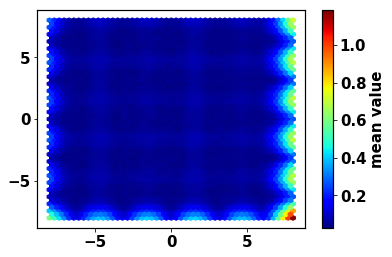

In [64]:
plt.hexbin(fx, fy, C=fstd, cmap=plt.cm.jet,gridsize=50)

ax.set_xlabel('x1',fontweight='bold',fontstyle='italic')
ax.set_ylabel('x2',fontweight='bold',fontstyle='italic')
cb = plt.colorbar()
cb.set_label('mean value',fontsize=FONT_SIZE, fontweight='bold')
title_label="exm1_heatmap_std"
plt.savefig(title_label+".png",bbox_inches='tight',transparent=True,
               pad_inches=0.05)
plt.show()

. . . . .

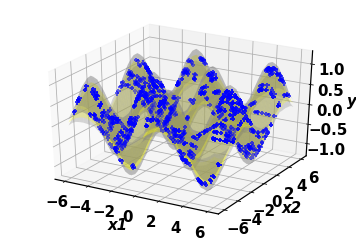

In [65]:
def fun(x, y):
    t1 = np.sin(x)
    t2 = np.sin(y)
    return t1*t2

def draw_surface(xst,xend,yst,yend):
#     x = np.arange(xst, xend, 0.3)
#     y = np.arange(yst, yend, 0.3)
    maxlimt = 20
    x = np.linspace(xst, xend, maxlimt)
    y = np.linspace(yst, yend, maxlimt)
    X, Y = np.meshgrid(x, y)
    X = X.T
    Y = Y.T
    # print X.shape
    # zs = np.array([predictStacked(np.array([x]).reshape(1,1),np.array([y]).reshape(1,1))[0] for x,y in zip(np.ravel(X), np.ravel(Y))])
    zs,zstd = predictStacked(x.reshape(-1,1), y.reshape(-1,1))
#     zs2 = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])

    Z2 = zs.reshape(X.shape)
    surface = ax.plot_surface(X, Y, Z2,color='yellow', shade=False, linewidth=0,alpha=0.25,label="mean")
    
#     Z2 = zs2.reshape(X.shape)
#     surface = ax.plot_surface(X, Y, Z2,color='yellow', shade=False, linewidth=0,alpha=0.25,label="true surface")

    lower = zs-2*zstd
    Z = (lower).reshape(X.shape)
    surface = ax.plot_surface(X, Y, Z,color='gray', shade=False, linewidth=0,alpha=0.3,label="lower bound")

    upper = zs+2*zstd
    Z = (upper).reshape(X.shape)
    surface = ax.plot_surface(X, Y, Z,color='gray', shade=False, linewidth=0,alpha=0.3,label="upper bound")


fig = plt.figure()
fig.set_rasterized(True)
ax = fig.add_subplot(111, projection='3d')
val = 6
draw_surface(0,val,0,val)
draw_surface(-val,0,-val,0)
draw_surface(0,val,-val,0)
draw_surface(-val,0,0,val)

# clrs = colors.to_rgb('gray')
# surface.set_facecolor('gray')
# surface.set_alpha(0.5)
ax.set_xlabel('x1',fontweight='bold',fontstyle='italic')
ax.set_ylabel('x2',fontweight='bold',fontstyle='italic')
ax.set_zlabel('y',fontweight='bold',fontstyle='italic')

# ax.scatter(x1_r_train,x2_r_train, a_train, marker='.', c='b', s=50)
anlyt_mean_test2, zstd = predictStacked(x1_test,x2_test)

pplus = np.abs(a_test -anlyt_mean_test2) > 2*zstd
ax.scatter(x1_r_test[pplus],x2_r_test[pplus], a_test[pplus], marker='.', c='r')

po =  abs(a_test -anlyt_mean_test2) <= 2*zstd
ax.scatter(x1_r_test[po],x2_r_test[po], a_test[po], marker='+', c='b')
# plt.legend(bbox_to_anchor=(0.47, 0.98), loc=2, borderaxespad=0.)


ax.set_rasterized(True)
ax.set_rasterization_zorder(0)
plt.show()

fig.savefig('../img/ss1_ard_false.eps', bbox_inches='tight', pad_inches=0.2, rasterized=True,dpi=300)

Testing Analytical approach on training samples....
anlyt_train_RMS =  0.000415754773033


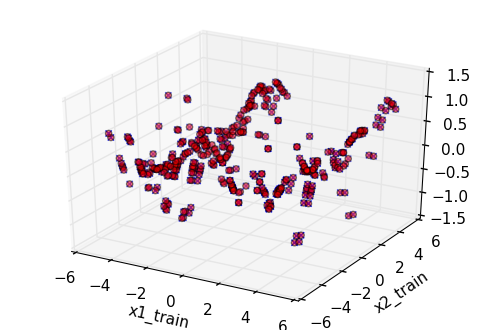

In [9]:
print 'Testing Analytical approach on training samples....'
x1_r_train_norm = np.repeat(x1_train_norm, ntraining, axis=1)
x2_r_train_norm = np.repeat(x2_train_norm, ntraining, axis=1).T

traininginput = np.concatenate((x1_r_train_norm.reshape(-1,1), x2_r_train_norm.reshape(-1,1)), axis=1)
# traininginput = linputsc.transform(traininginput)

anlyt_mean_train, var = stackedNetwork.predict(traininginput, covoption=2, jitter=0)
anlyt_mean_train = anlyt_mean_train[-1]
var = var[-1]

anlyt_mean_train2 = a_train_sc.inverse_transform(anlyt_mean_train.reshape(-1,1)).reshape(-1,ntraining)

anlyt_train_err, anlyt_train_rms = ToyUtil.getRMS(a_train, anlyt_mean_train2)
print 'anlyt_train_RMS = ', anlyt_train_rms

ToyUtil.plottingScatter3D(x1_r_train,'x1_train',x2_r_train,'x2_train', a_train,'Actual_Data_train', anlyt_mean_train2,
                       'Predicting_Analytical_mean', savefname='syn_train_1.eps')

Testing Analytical approach on testing samples....


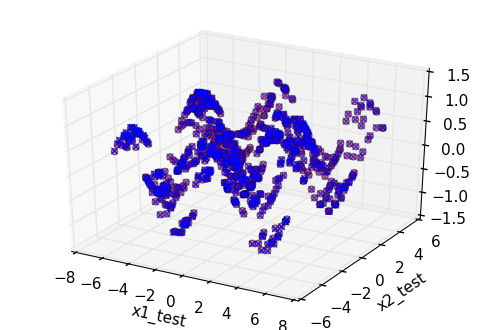

anlyt_test_RMS2 =  0.0313845371929
AvgRatio =  0.0224901136554


In [10]:
print 'Testing Analytical approach on testing samples....'

x1_test_norm =x1_train_sc.transform(x1_test)
x2_test_norm = x2_train_sc.transform(x2_test)

x1_r_test_norm = np.repeat(x1_test_norm, ntesting, axis=1)
x2_r_test_norm = np.repeat(x2_test_norm, ntesting, axis=1).T

testinginput = np.concatenate((x1_r_test_norm.reshape(-1,1), x2_r_test_norm.reshape(-1,1)), axis=1)

anlyt_mean_test, var_test = stackedNetwork.predict(testinginput, covoption=1, jitter=0)
anlyt_mean_test = anlyt_mean_test[-1]
var_test = var_test[-1]

anlyt_mean_test2 = a_train_sc.inverse_transform(anlyt_mean_test.reshape(-1,1)).reshape(-1,ntesting)

var_test2 = a_train_sc.inverse_transform(var_test.reshape(-1,1)).reshape(-1,ntesting)

anlyt_test_err2, anlyt_test_rms2 = ToyUtil.getRMS(a_test, anlyt_mean_test2)

ToyUtil.plottingScatter3D(x1_r_test,'x1_test',x2_r_test,'x2_test', a_test,'Actual_Data_test', anlyt_mean_test2,
                       'Predicting_Analytical_mean', savefname='syn_test_1.eps')
print 'anlyt_test_RMS2 = ', anlyt_test_rms2
print 'AvgRatio = ', np.array(abs(a_test-anlyt_mean_test2)/np.sqrt(var_test2).reshape(a_test.shape)).mean()


In [48]:
var_test2.min(), var_test2.max()

(0.040876687256674232, 0.05321458223951353)